# Devoir de Calcul Différentiel : Courbes de niveau

## Préambule

### Dépendances logicielles

In [1]:
# Python Standard Libraries
import math
from math import isclose
from random import random

In [2]:
# Third-Party Libraries

import autograd
import autograd.numpy as np
from autograd.numpy import linalg

import matplotlib as mpl
import matplotlib.pyplot as plt

### Différentiation automatique

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

## Ensemble de niveaux

### Analyse des ensembles de niveaux

#### Question 1

Soit $c \in \mathbb{R}$, l'ensemble $\{c\}$ est un fermé. La fonction $f$ étant continue, la courbe de niveau $c$, qui est en fait $f^-1(\{c\})$ est également un fermé.

#### Question 2

On remarque que le vecteur $T = \frac {1} {\|\nabla f(x_0)\|} \begin{pmatrix} \partial_2 f(x_0) \\ -\partial_1 f(x_0) \end{pmatrix}$ est le vecteur normalisé orthogonal au gradient donc tangent à la courbe au point $x_0$. Ainsi, $p(x_1,x_2)$ correspond au produit scalaire entre $T$ et le vecteur $MM_0 = \begin{pmatrix} x_1 - x_{10} \\ x_2 - x_{20} \end{pmatrix}$, ce qui géométriquement correspond à la projection orthogonale de $MM_0$ sur  $T$.

#### Question 3

On pose $ \phi : \mathbb{R}^2 \times \mathbb{R} \to \mathbb{R}^2$ telle que $ \forall (x,t) \in \mathbb{R}^2 \times \mathbb{R},  \phi(x,t) = \begin{pmatrix} f(x) - c \\ t - p(x) \end{pmatrix}$. $f$ est continûment différentiable par hypothèse, et $\phi$ l'est car polynomiale en les coefficents de $x$.   
     
Vérifions les hypothèses du théorème des fonctions implicites :  
- $\phi(x_0,p(x_0)) = 0$ 
- Soit $\partial_x \phi(x_0,p(x_0))= \begin{pmatrix} \partial_1 f(x_0)& \partial_2 f(x_0) \\ -\frac {\partial_2 f(x_0)} {\|\nabla f(x_0)\|} & \frac {\partial_1 f(x_0)} {\|\nabla f(x_0)\|} \end{pmatrix}$.    
       
On remarque alors que $det(\partial_x \phi(x_0,p(x_0))) = \|\nabla f(x_0)\| \ne 0$, donc $\partial_x \phi(x_0,p(x_0))$ est bien inversible.    
    
Le théorème dans sa version étendue s'applique, donc il existe un voisinage ouvert de $p(x_{10},x_{20})=0$, c'est-à-dire un intervalle $]-\varepsilon,\varepsilon[$, avec $\varepsilon > 0$ et un voisinage ouvert $U$ de $x_0$ et $\gamma : \mathbb{R} \to \mathbb{R}^2$ continûment différentiable telle que $\forall t \in ]-\varepsilon,\varepsilon[ $ et $ \forall x \in U \ \phi(x,t) = 0 \Leftrightarrow (x_1,x_2) = \gamma(t)$, et comme lorsque $\phi(x,t)=0, \ t=p(x)$, on obtient bien le résultat demandé.

#### Question 4

Soit $t \in ]-\varepsilon,\varepsilon[$,

- Montrons que $\gamma'(t)$ est non nul :      
Le théorème des fonctions implicites, que l'on a utilisé à la question précédente pour obtenir la fonction $\gamma$, nous donne :      
$ \forall t \in ]-\varepsilon,\varepsilon[, \ \gamma'(t) = [\partial_x \phi(y,t)]^{-1} \cdot \partial_t \phi(y,t) $, avec $y = p(x_1,x_2)$.        
Or, $\forall (x,t) \in \mathbb{R}^2 \times \mathbb{R} , \ \partial_t \phi(x,t) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$, ce qui signifie que $\gamma'(t)$ est la deuxième colonne de $[\partial_x \phi(y,t)]^{-1}$, qui est effectivement non nul car sinon le déterminant de $[\partial_x \phi(y,t)]^{-1}$ serait nul.

             
- Montrons que $\gamma'(t)$ est orthogonal à $\nabla f(\gamma(t))$, c'est-à-dire que $<\nabla f(\gamma(t)),\gamma(t)> \, = 0$ :      
Par définition, $\forall t \in ]-\varepsilon,\varepsilon[, \ f \circ \gamma(t) \, = c$, donc en différenciant, on obtient : 
$ \nabla f(\gamma(t))^{T} \cdot \gamma'(t) \, = 0 $, ce qui est bien le résultat voulu.

### Construction des courbes de niveau

#### Question 5 

In [5]:
N = 100
eps = 1e-8

L'algorithme de Newton est peu sensible aux erreurs d'arrondi car il converge rapidement pour autant qu'on soit relativement proche de la racine cherchée. Par conséquent, il n'y a pas besoin de choisir une valeur de `eps` trop petite. Comme dans l'exemple du cours sur les différences finies, on peut prendre `eps = 1e-8` pour éviter à la fois les erreurs de troncature et d'arrondi.

#### Tâche 1

In [6]:
def Newton(F, x0, y0, eps = eps, N = N) :
    
    for i in range(N) :
        
        J_F = J(F)(x0, y0)
        X0 = np.array([x0, y0])
        M = linalg.inv(J_F)
        
        X = X0 - M.dot(F(x0, y0))
        x, y = X[0], X[1]        
        
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        
        x0, y0 = x, y
    
    raise ValueError(f"no convergence in {N} steps.")

#### Tâche 2

Le point de la courbe de niveau c = 0.8, respectant la condition x1 = x2, et obtenu à partir des conditions
initiales x10 = x20 = 0.8, est le point de coordonnées (0.4472135954999579, 0.4472135954999579)


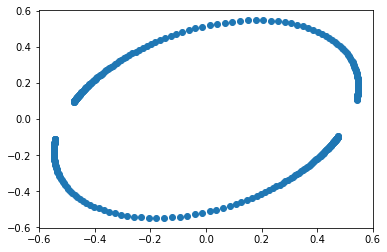

In [7]:
# On recode Newton en ajoutant la possibilité de mettre une contrainte entre x1 et x2

def Newton_2(F, x0, y0, eps = eps, N = N, k = 1) :
        
    def F_2(F, k) :
            
        def F2(x, y):
            return np.array([F(x,y), x - k*y])
            
        return F2
        
    F_2 = F_2(F, k)
        
    return Newton(F_2, x0, y0, eps, N)

def f(x, y):
    x = np.array(x)
    y = np.array(y)
    return 3.0*x*x - 2.0*x*y + 3.0*y*y - 0.8

print(f"""Le point de la courbe de niveau c = 0.8, respectant la condition x1 = x2, et obtenu à partir des conditions
initiales x10 = x20 = 0.8, est le point de coordonnées {Newton_2(f, 0.8, 0.8)}""")

X = []
Y = []

for q in np.linspace(-5.0, 5.0, 200):
    x, y = Newton_2(f, 0.8, 0.8, k = q)
    x_, y_ = Newton_2(f, -0.8, -0.8, k = q)
    X.append(x) ; X.append(x_)
    Y.append(y) , Y.append(y_)

plt.scatter(X, Y)
plt.show()

### Génération des points

#### Question 6 et Tâche 3

Pour cette question 6, on va chercher les 0 consécutifs de fonctions définies à l'aide des points successifs $(x_0, y_0),\:  \cdots,\: (x_{N-1}, y_{N-1}) $ comme $F_{x_i, y_i} : (x,y) \in \mathbb{R}^2 \mapsto \begin{pmatrix}(x-x_i)^2 \: +\: (y-y_i)^2\:-\:  \delta ^2\\ f(x,y)\: -\: c\end{pmatrix}$ 

  Pour que l'on s'oriente "à droite" quand on est en $(x_i, y_i)$ en regardant dans la direction du gradient de f en ce point, on doit prendre pour point de départ dans la recherche de Newton un point "à droite" de celui qu'on a déjà. Pour cela, on prend le point $(x_{depart}, y_{depart})$ tel que $\begin{pmatrix}x_{depart}\\ y_{depart}\end{pmatrix}\: =\: \begin{pmatrix}x_i\\ y_i\end{pmatrix}\: +\: \frac{\delta }{\left \|\triangledown f(x_i, y_i) \right \|}\begin{pmatrix}\partial_yf(x_i, y_i)\\ -\partial_xf(x_i, y_i)\end{pmatrix}$ où on à effectuer une rotation d'angle $-\frac{\pi }{2}

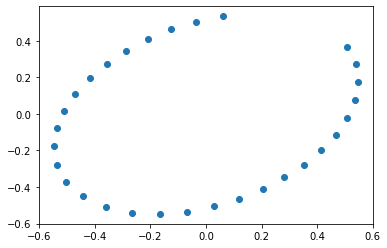

In [8]:
def F_centre(F, x0, y0, delta):
    def F_cercle(x, y):
        return np.array([F(x, y), (x-x0)**2 + (y-y0)**2 - delta**2])
    return F_cercle

def rotation_grad(F, x0, y0):
    grad_F = grad(F)
    grad_rot = np.array([grad_F(x0, y0)[1], -grad_F(x0, y0)[0]])
    return grad_rot/linalg.norm(grad_rot)

def level_curve(F, x0, y0, delta = 0.1, N = 30, eps = eps):
    x = []
    y = []
    for i in range(N):
        F_cercle = F_centre(F, x0, y0, delta)
        xdep, ydep = x0 + delta*rotation_grad(F, x0, y0)[0], y0 + delta*rotation_grad(F, x0, y0)[1]
        x_, y_ = Newton(F_cercle, xdep, ydep)
        x.append(x_)
        y.append(y_)
        x0, y0 = x_, y_
    return np.array([x, y])

M = level_curve(f, 0.45, 0.45)
plt.scatter(M[0], M[1])
plt.show()

### Bouclage et auto-intersection

#### Question 7 et Tâche 4